# Recurrent Neural Networks, Long Short Term Memory

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from google.colab import drive

In [2]:
# moutning google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataset = pd.read_csv('/content/drive/My Drive/On campus jobs/ML TA/Demo 12/airline-passengers.csv', engine='python')
dataset

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
# loading only the passenger count and scaling the data
dataframe = pd.read_csv('/content/drive/My Drive/On campus jobs/ML TA/Demo 12/airline-passengers.csv', usecols = [1], engine='python')
dataframe

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [5]:
dataset = dataframe.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(dataset)
dataset

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [6]:
# splitting into train and test sets
train_size = int(len(dataset) * 0.7)
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:] 

In [7]:
# converting an array of values into a dataset matrix
def create_dataset(dataset, look_back = 1):
	dataX, dataY = [], []
	for i in range(len(dataset) - look_back - 1):
		a = dataset[i:(i + look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [8]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
# reshaping the dataset
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [10]:
trainX.shape

(98, 1, 1)

In [11]:
# creating and training the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 96        
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(trainX, trainY, epochs = 100, batch_size = 1, verbose = 2)

Epoch 1/100
98/98 - 3s - loss: 0.0484 - 3s/epoch - 33ms/step
Epoch 2/100
98/98 - 0s - loss: 0.0240 - 280ms/epoch - 3ms/step
Epoch 3/100
98/98 - 0s - loss: 0.0172 - 298ms/epoch - 3ms/step
Epoch 4/100
98/98 - 0s - loss: 0.0157 - 273ms/epoch - 3ms/step
Epoch 5/100
98/98 - 0s - loss: 0.0148 - 247ms/epoch - 3ms/step
Epoch 6/100
98/98 - 0s - loss: 0.0138 - 246ms/epoch - 3ms/step
Epoch 7/100
98/98 - 0s - loss: 0.0128 - 209ms/epoch - 2ms/step
Epoch 8/100
98/98 - 0s - loss: 0.0117 - 217ms/epoch - 2ms/step
Epoch 9/100
98/98 - 0s - loss: 0.0106 - 292ms/epoch - 3ms/step
Epoch 10/100
98/98 - 0s - loss: 0.0095 - 227ms/epoch - 2ms/step
Epoch 11/100
98/98 - 0s - loss: 0.0084 - 268ms/epoch - 3ms/step
Epoch 12/100
98/98 - 0s - loss: 0.0075 - 339ms/epoch - 3ms/step
Epoch 13/100
98/98 - 0s - loss: 0.0066 - 272ms/epoch - 3ms/step
Epoch 14/100
98/98 - 0s - loss: 0.0055 - 233ms/epoch - 2ms/step
Epoch 15/100
98/98 - 0s - loss: 0.0048 - 231ms/epoch - 2ms/step
Epoch 16/100
98/98 - 0s - loss: 0.0042 - 280ms/epoc

In [13]:
# making predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# inverting predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculating root mean squared error

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.41 RMSE
Test Score: 48.68 RMSE


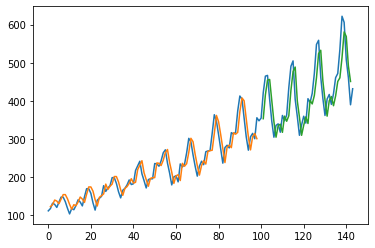

In [14]:
# shifting train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

# shifting test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()